In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 切换绝对路径.
%pwd
os.chdir(r"D:/ai/project/multiappl/src/验证代码")

In [3]:
# 读取各客群的训练测试集与验证集
Train_Test_Cash_Off = pd.read_csv("Train_Test_Cash_Off.csv")
Train_Test_Cons_On = pd.read_csv("Train_Test_Cons_On.csv")
Train_Test_Revoloan = pd.read_csv("Train_Test_Revoloan.csv")
Validation_Cash_Off = pd.read_csv("Validation_Cash_Off.csv")
Validation_Cons_On = pd.read_csv("Validation_Cons_On.csv")
Validation_Revoloan = pd.read_csv("Validation_Revoloan.csv")

Train_Test_Cash_Off.columns = ["numb", "probability", "y", "cus_num"]
Train_Test_Cons_On.columns = ["numb", "probability", "y", "cus_num"]
Train_Test_Revoloan.columns = ["numb", "probability", "y", "cus_num"]
Validation_Cash_Off.columns = ["numb", "probability", "y", "cus_num"]
Validation_Cons_On.columns = ["numb", "probability", "y", "cus_num"]
Validation_Revoloan.columns = ["numb", "probability", "y", "cus_num"]

In [4]:
# 去除输出为-1的样本
Train_Test_Cash_Off = Train_Test_Cash_Off[Train_Test_Cash_Off["probability"] != -1]
Train_Test_Cons_On = Train_Test_Cons_On[Train_Test_Cons_On["probability"] != -1]
Train_Test_Revoloan = Train_Test_Revoloan[Train_Test_Revoloan["probability"] != -1]
Validation_Cash_Off = Validation_Cash_Off[Validation_Cash_Off["probability"] != -1]
Validation_Cons_On = Validation_Cons_On[Validation_Cons_On["probability"] != -1]
Validation_Revoloan = Validation_Revoloan[Validation_Revoloan["probability"] != -1]

In [5]:
# 对概率值进行max-min归一化.
max_prob = Train_Test_Cash_Off["probability"].max()
min_prob = Train_Test_Cash_Off["probability"].min()
Train_Test_Cash_Off["probability"] = Train_Test_Cash_Off["probability"].map(lambda x: (x - min_prob)/(max_prob - min_prob))

max_prob = Train_Test_Cons_On["probability"].max()
min_prob = Train_Test_Cons_On["probability"].min()
Train_Test_Cons_On["probability"] = Train_Test_Cons_On["probability"].map(lambda x: (x - min_prob)/(max_prob - min_prob))

max_prob = Train_Test_Revoloan["probability"].max()
min_prob = Train_Test_Revoloan["probability"].min()
Train_Test_Revoloan["probability"] = Train_Test_Revoloan["probability"].map(lambda x: (x - min_prob)/(max_prob - min_prob))

max_prob = Validation_Cash_Off["probability"].max()
min_prob = Validation_Cash_Off["probability"].min()
Validation_Cash_Off["probability"] = Validation_Cash_Off["probability"].map(lambda x: (x - min_prob)/(max_prob - min_prob))

max_prob = Validation_Cons_On["probability"].max()
min_prob = Validation_Cons_On["probability"].min()
Validation_Cons_On["probability"] = Validation_Cons_On["probability"].map(lambda x: (x - min_prob)/(max_prob - min_prob))

max_prob = Validation_Revoloan["probability"].max()
min_prob = Validation_Revoloan["probability"].min()
Validation_Revoloan["probability"] = Validation_Revoloan["probability"].map(lambda x: (x - min_prob)/(max_prob - min_prob))

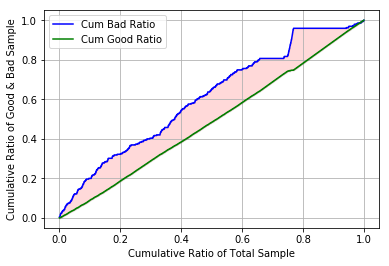

0.21139125887949395

In [8]:
# Cash Off验证集的KS表现(注：KS函数与PSI函数均在代码块末尾).
ks_stats(Validation_Cash_Off)

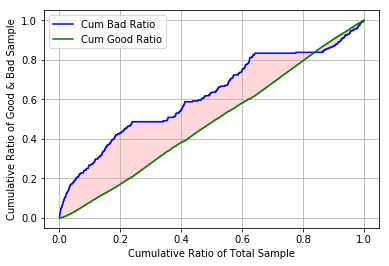

0.27850877192982459

In [9]:
# Cons On验证集的KS表现.
ks_stats(Validation_Cons_On)

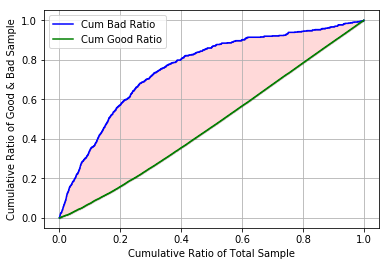

0.46953550118772142

In [10]:
# Revoloan验证集的KS表现.
ks_stats(Validation_Revoloan)

d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:64: RuntimeWarning: divide by zero encountered in log


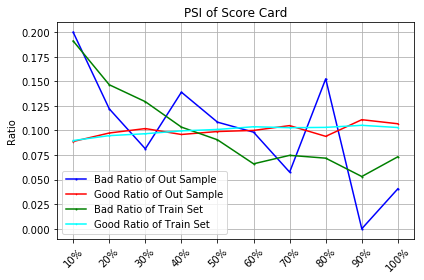

Average PSI:0.070026


y,0_left,1_left,bad_ratio_left,good_ratio_left,0_right,1_right,bad_ratio_right,good_ratio_right,psi_bad,psi_good
quantile,,,,,,,,,,
10%,236.0,59.0,0.200000,0.088789,556,133,0.191092,0.089764,0.000406,0.000011
20%,259.0,36.0,0.122034,0.097442,587,102,0.146552,0.094769,0.004489,0.000074
30%,271.0,24.0,0.081356,0.101956,599,90,0.129310,0.096706,0.022221,0.000278
40%,255.0,41.0,0.138983,0.095937,617,72,0.103448,0.099613,0.010493,0.000138
50%,263.0,32.0,0.108475,0.098947,626,63,0.090517,0.101066,0.003250,0.000045
60%,266.0,29.0,0.098305,0.100075,643,46,0.066092,0.103810,0.012790,0.000137
70%,279.0,17.0,0.057627,0.104966,637,52,0.074713,0.102841,0.004436,0.000043
80%,250.0,45.0,0.152542,0.094056,639,50,0.071839,0.103164,0.060771,0.000842
90%,295.0,0.0,0.000000,0.110986,652,37,0.053161,0.105263,inf,0.000303


In [11]:
# 验证Cash Off验证集与训练测试集的PSI表现，其中左参数为验证集，右参数为训练测试集.
psi_stats_prob(Validation_Cash_Off, Train_Test_Cash_Off)

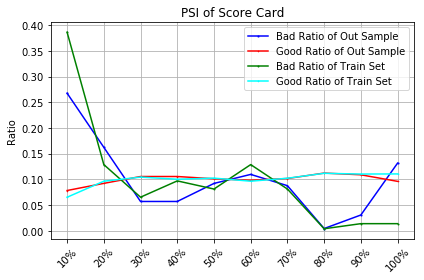

Average PSI:0.180986


y,0_left,1_left,bad_ratio_left,good_ratio_left,0_right,1_right,bad_ratio_right,good_ratio_right,psi_bad,psi_good
quantile,,,,,,,,,,
10%,141,61,0.267544,0.078333,272,195,0.386139,0.065243,0.043514,0.002393
20%,166,37,0.162281,0.092222,402,65,0.128713,0.096426,0.007779,0.000187
30%,190,13,0.057018,0.105556,435,33,0.065347,0.104342,0.001136,0.000014
40%,190,13,0.057018,0.105556,418,49,0.097030,0.100264,0.021273,0.000272
50%,182,21,0.092105,0.101111,427,41,0.081188,0.102423,0.001377,0.000017
60%,177,25,0.109649,0.098333,402,65,0.128713,0.096426,0.003056,0.000037
70%,183,20,0.087719,0.101667,426,41,0.081188,0.102183,0.000505,0.000003
80%,202,1,0.004386,0.112222,466,2,0.003960,0.111777,0.000043,0.000002
90%,196,7,0.030702,0.108889,460,7,0.013861,0.110338,0.013392,0.000019


In [12]:
# 验证Cons On验证集与训练测试集的PSI表现，其中左参数为验证集，右参数为训练测试集.
psi_stats_prob(Validation_Cons_On, Train_Test_Cons_On)

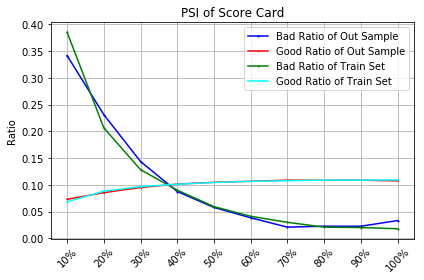

Average PSI:0.011768


y,0_left,1_left,bad_ratio_left,good_ratio_left,0_right,1_right,bad_ratio_right,good_ratio_right,psi_bad,psi_good
quantile,,,,,,,,,,
10%,375,195,0.341506,0.073028,818,513,0.385135,0.068263,0.005245,3.214989e-04
20%,439,132,0.231173,0.085492,1057,275,0.206456,0.088208,0.002795,8.497827e-05
30%,488,82,0.143608,0.095034,1160,171,0.128378,0.096804,0.001707,3.265275e-05
40%,521,50,0.087566,0.101461,1212,120,0.090090,0.101143,0.000072,9.937194e-07
50%,538,33,0.057793,0.104771,1252,79,0.059309,0.104481,0.000039,8.028697e-07
60%,548,22,0.038529,0.106719,1277,55,0.041291,0.106568,0.000191,2.136944e-07
70%,559,12,0.021016,0.108861,1291,40,0.030030,0.107736,0.003217,1.168242e-05
80%,557,13,0.022767,0.108471,1304,28,0.021021,0.108821,0.000139,1.124643e-06
90%,558,13,0.022767,0.108666,1304,27,0.020270,0.108821,0.000290,2.203973e-07


In [13]:
# 验证Revoloan验证集与训练测试集的PSI表现，其中左参数为验证集，右参数为训练测试集.
psi_stats_prob(Validation_Revoloan, Train_Test_Revoloan)

In [6]:
def ks_stats(data, non_computed=None, plot_image=True):
    """Calculate Kolmogorov-Smirnov value.
    
    Parameters
    ----------
    data : pandas.DataFrame
        The necessary columns ‘probability’, ‘y’ must be in data.
        
    non_computed : str or None
        The column name of non-computed probability indicators.
        
    plot_image : bool (default True)
        Plot image.
        
    Returns
    -------
    ks_max : float
        The max of Kolmogorov-Smirnov value.
    """
    
    """Check columns of data."""
    check_cols = ['probability', 'y']
    for col in check_cols:
        if col not in data.columns:
            raise ValueError('There is no column %s of data.' % col)
            
    """Drop NaN by column 'probability'."""
    data = data.loc[data['probability'].notnull(), check_cols]
    
    """Define function for swapping label 'y'."""
    def swap_label(data):
        bad_index = (data == 1)
        data[bad_index], data[~bad_index] = 0, 1
    
    """Compute cum bad ratio, cum good ratio and max KS."""
    data_sorted = data.sort_values(by=['probability'], ascending=False)['y']
    total_bad, total_good = data_sorted.sum(), data_sorted.shape[0] - data_sorted.sum()
    cum_bad_amount = data_sorted.cumsum()
    swap_label(data_sorted)
    cum_good_amount = data_sorted.cumsum()
    cum_bad_ratio, cum_good_ratio = cum_bad_amount / float(total_bad), cum_good_amount / float(total_good)
    ks_max = np.fabs(cum_good_ratio - cum_bad_ratio).max()
    
    """Plot image."""
    if plot_image == True:
        plt.figure()
        rate_range = np.arange(0.0, 1.0, 1.0/data_sorted.shape[0])
        plt.plot(rate_range, cum_bad_ratio, color='blue', marker='o', 
                 markersize=0.01, label='Cum Bad Ratio')
        plt.plot(rate_range, cum_good_ratio, color='green', marker='s', 
                 markersize=0.01, label='Cum Good Ratio') 
        plt.fill_between(rate_range, cum_good_ratio, cum_bad_ratio, 
                         alpha=0.15, color='red')
        plt.grid()
        plt.legend(loc='upper left')
        plt.xlabel('Cumulative Ratio of Total Sample')
        plt.ylabel('Cumulative Ratio of Good & Bad Sample')
        plt.ylim([-0.05, 1.05])
        plt.show()
    return ks_max

In [7]:
def psi_stats_prob(data_left, data_right,non_computed=None, plot_image=True):
    """Calculate Average PSI value.
    
    Parameters
    ----------
    data_left: pandas.DataFrame
        The necessary columns ‘probability’, ‘y’, ‘cus_num’ must be in data.
        
    data_right: pandas.DataFrame
        The necessary columns ‘probability’, ‘y’, ‘cus_num’ must be in data.
        
    plot_image : bool (default True)
        Plot image.
        
    Returns
    -------
    psi_table : pandas.DataFrame
        The PSI value of probability interval.
    """
    
    """Check columns of data."""
    check_cols = ['probability', 'y', 'cus_num']
    if non_computed != None and type(non_computed) == str:
        check_cols += [non_computed]
        data_left = data_left[~data_left[non_computed] == True].copy()
        data_right = data_right[~data_right[non_computed] == True].copy()
    elif non_computed == None:
        data_left = data_left.copy()
        data_right = data_right.copy()
    else:
        raise ValueError('non_computed must be a str.')
    for col in check_cols:
        if col not in data_left.columns or col not in data_right.columns:
            raise ValueError('There is no column %s of data' % col) 
            
    """Drop NaN and sort values by column 'probability'."""
    data_left = data_left.loc[data_left['probability'].notnull(), check_cols]
    data_right = data_right.loc[data_right['probability'].notnull(), check_cols]
    data_left.sort_values(by=['probability'], inplace=True, ascending=False)
    data_right.sort_values(by=['probability'], inplace=True, ascending=False)
    data_left.reset_index(drop=True, inplace=True) 
    data_right.reset_index(drop=True, inplace=True) 
    
    """Discrete probability value."""
    break_points_left = [int(data_left.shape[0]*i) for i in np.arange(0.0, 1.1, 0.1)]
    break_points_right = [int(data_right.shape[0]*i) for i in np.arange(0.0, 1.1, 0.1)]
    quantile_str = [str(i)+'%' for i in np.arange(10, 110, 10)]
    for i in range(len(break_points_left)):
        if i == len(break_points_left) - 1:
            break
        else:
            data_left.loc[break_points_left[i]:break_points_left[i+1], 'quantile'] = quantile_str[i]  
            data_right.loc[break_points_right[i]:break_points_right[i+1], 'quantile'] = quantile_str[i]       
    
    """Count psi of bad & good sample."""
    count_left = data_left.groupby(['quantile', 'y']).count()['cus_num'].unstack().fillna(value=0.0)
    count_right = data_right.groupby(['quantile', 'y']).count()['cus_num'].unstack().fillna(value=0.0)
    count_left['bad_ratio'] = count_left[1]/count_left[1].sum()
    count_right['bad_ratio'] = count_right[1]/count_right[1].sum()
    count_left['good_ratio'] = count_left[0]/count_left[0].sum()
    count_right['good_ratio'] = count_right[0]/count_right[0].sum()
    count_final = pd.merge(count_left, count_right, left_index=True, 
                           right_index=True, suffixes=['_left', '_right'])
    count_final['psi_bad'] = (count_left['bad_ratio'] - count_right['bad_ratio']) *\
                             np.log(count_left['bad_ratio'] / count_right['bad_ratio'])
    count_final['psi_good'] = (count_left['good_ratio'] - count_right['good_ratio']) * \
                             np.log(count_left['good_ratio'] / count_right['good_ratio'])
    count_final = count_final.reindex(quantile_str)
    average_psi = (count_final['psi_bad'].replace([np.inf, np.nan], 0.0).sum() + \
                   count_final['psi_good'].replace([np.inf, np.nan], 0.0).sum())/2
    
    """Plot image"""   
    if plot_image == True:
        plot_range = ['bad_ratio_left', 'good_ratio_left', 
                      'bad_ratio_right', 'good_ratio_right']
        plot_label = ['Bad Ratio of Out Sample', 'Good Ratio of Out Sample', 
                      'Bad Ratio of Train Set', 'Good Ratio of Train Set']
        color = ['blue', 'red', 'green', 'cyan']
        marker = ['s', 'x', 'o', 'v']
        plt.figure()
        for p, l, c, m in zip(plot_range, plot_label, color, marker):
            value = count_final[p].values
            prob_range = range(len(count_final.index))
            quantile_label = quantile_str
            plt.plot(prob_range, value, color=c, marker=m, 
                     markersize=1, label=l)
        plt.grid()
        plt.legend(loc='best')
        plt.xticks(prob_range, quantile_label, rotation=45)
        plt.title('PSI of Score Card')
        plt.ylabel('Ratio')
        plt.tight_layout()
        plt.show()     
    print ('Average PSI:%f' % average_psi )
    return count_final